# Ієрархічна кластеризація

* Імпортуємо бібліотеки:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

* Зчитуємо набори даних:



In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/FirstDataset.csv')
data = dataset.iloc[:, 2:4].values

In [9]:
dataset.describe()

,GNI,Quality of Life Index,Crime Index,Сivilian firearms
count,214.000000,214.000000,214.000000,214.000000
mean,16918.827103,105.115140,45.850327,9.852804
std,23818.609301,39.812885,16.319189,12.328857
min,270.000000,13.920000,10.820000,0.000000
25%,2300.000000,72.725000,33.285000,2.100000
50%,6600.000000,98.530000,46.490000,5.900000
75%,21975.000000,133.672500,57.235000,13.925000
max,173000.000000,198.390000,85.830000,120.500000


* Виключаємо інформацію про регіони, зберігаємо її для подальшого використання:

In [10]:
varieties = list(dataset.pop('Region'))

* Використовуємо дендрограму для пошуку оптимальної кількості кластерів:

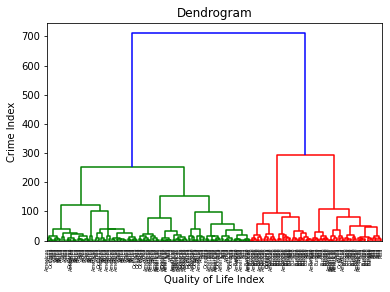

In [11]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'), labels=varieties )
plt.title('Dendrogram')
plt.xlabel('Quality of Life Index')
plt.ylabel('Crime Index')
plt.show()

* Тренуємо модель ієрархічної кластеризації на датасеті:

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

* Виконуємо візуалізацію кластеризації:

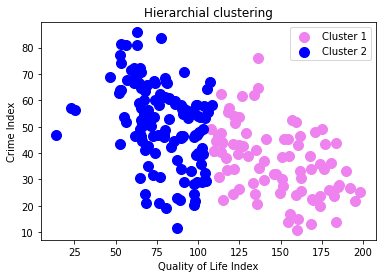

In [13]:
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 100, c = 'violet', label = 'Cluster 1')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Hierarchial clustering')
plt.xlabel('Quality of Life Index')
plt.ylabel('Crime Index')
plt.legend()
plt.show()

* **Зробимо також кластерний аналіз Crime Index та Civilian firearms**

* Підключаємо датасет та обираємо відповідні колонки:

In [15]:
dataset1 = pd.read_csv('/content/drive/MyDrive/FirstDataset.csv')
data1 = dataset1.iloc[:, [3, 5]].values
print(data1)

[[ 48.16 120.5 ]
 [ 69.74  52.8 ]
 [ 65.95  42.5 ]
 [ 41.1   39.1 ]
 [ 38.29  39.1 ]
 [ 42.95  34.7 ]
 [ 51.44  34.7 ]
 [ 32.12  34.7 ]
 [ 27.25  32.4 ]
 [ 46.87  31.9 ]
 [ 23.53  31.7 ]
 [ 42.63  31.2 ]
 [ 26.08  30.  ]
 [ 40.87  29.8 ]
 [ 13.73  28.8 ]
 [ 33.85  28.8 ]
 [ 40.82  28.3 ]
 [ 21.68  27.6 ]
 [ 43.3   26.3 ]
 [ 43.41  23.8 ]
 [ 49.    23.1 ]
 [ 38.83  22.3 ]
 [ 42.01  22.3 ]
 [ 30.58  21.3 ]
 [ 52.41  19.6 ]
 [ 36.37  19.6 ]
 [ 46.95  19.6 ]
 [ 25.08  19.6 ]
 [ 35.71  18.9 ]
 [ 62.48  18.8 ]
 [ 40.24  18.7 ]
 [ 83.58  18.5 ]
 [ 47.41  17.6 ]
 [ 30.99  17.4 ]
 [ 33.41  16.7 ]
 [ 19.99  16.7 ]
 [ 49.2   16.7 ]
 [ 13.78  16.7 ]
 [ 24.72  16.7 ]
 [ 15.14  16.7 ]
 [ 61.24  16.6 ]
 [ 39.69  16.5 ]
 [ 53.21  15.9 ]
 [ 68.93  15.8 ]
 [ 22.65  15.6 ]
 [ 64.7   15.4 ]
 [ 39.31  15.1 ]
 [ 43.85  14.5 ]
 [ 45.2   14.4 ]
 [ 13.24  14.4 ]
 [ 10.82  14.1 ]
 [ 74.16  14.1 ]
 [ 36.9   14.  ]
 [ 24.13  13.7 ]
 [ 33.28  13.6 ]
 [ 60.28  13.3 ]
 [ 53.68  12.9 ]
 [ 24.41  12.8 ]
 [ 45.38  12.7

* Використовуємо дендрограму для пошуку оптимальної кількості кластерів:

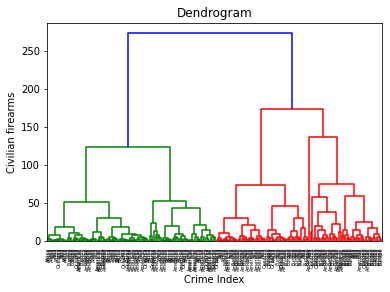

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data1, method = 'ward'), labels=varieties)
plt.title('Dendrogram')
plt.xlabel('Crime Index')
plt.ylabel('Civilian firearms')
plt.show()

* Тренуємо модель ієрархічної кластеризації на датасеті:

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

* Виконуємо візуалізацію кластеризації:

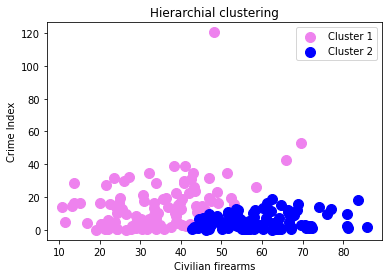

In [18]:
plt.scatter(data1[y_hc == 0, 0], data1[y_hc == 0, 1], s = 100, c = 'violet', label = 'Cluster 1')
plt.scatter(data1[y_hc == 1, 0], data1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Hierarchial clustering')
plt.xlabel('Civilian firearms')
plt.ylabel('Crime Index')
plt.legend()
plt.show()